In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [2]:
tita = pd.read_csv('/Users/User/Downloads/train.csv')
tita

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
tita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
tita.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

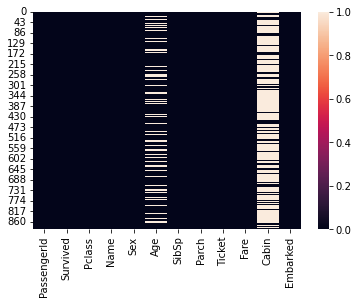

In [5]:
'''
parch=parent and children
sibp=sibling or spouse
embarked=starting point
'''
sb.heatmap(tita.isnull())

In [6]:
tita.drop('Cabin',axis=1,inplace=True)
tita

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[891 rows x 11 columns]

In [7]:
tita.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [8]:
tita.drop(['PassengerId','Name', 'Ticket', 'Fare'],axis=1,inplace=True)

In [9]:
tita.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

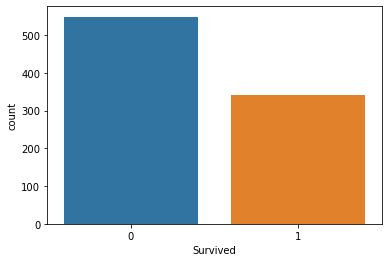

In [10]:
sb.countplot(data=tita,x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

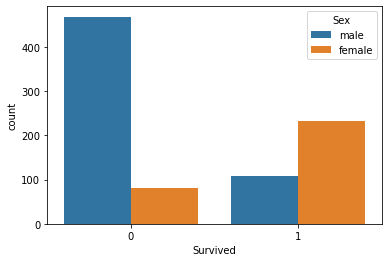

In [11]:
sb.countplot(data=tita,x='Survived',hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

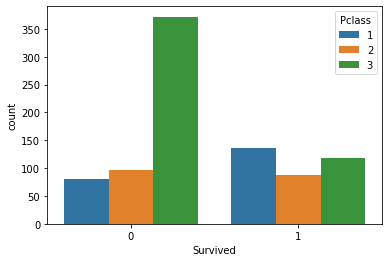

In [12]:
sb.countplot(data=tita,x='Survived',hue='Pclass')

In [13]:
# cleaning data
tita.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [14]:
mean_age=dict()
for i in tita['Pclass']:
    mean_age[i]=round(tita[tita['Pclass']==i]['Age'].mean())
mean_age

{3: 25, 1: 38, 2: 30}

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

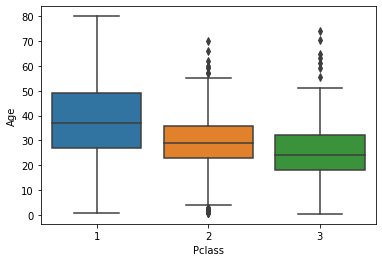

In [15]:
sb.boxplot(data=tita,x="Pclass",y='Age')

In [16]:
def fill_age(col):
    age = col[0]
    cl = col[1]
    if pd.isnull(age):
        return mean_age[cl]
    return int(age)

In [17]:
tita['Age']=tita[['Age','Pclass']].apply(fill_age,axis=1)
tita

Survived  Pclass     Sex  Age  SibSp  Parch Embarked
0           0       3    male   22      1      0        S
1           1       1  female   38      1      0        C
2           1       3  female   26      0      0        S
3           1       1  female   35      1      0        S
4           0       3    male   35      0      0        S
..        ...     ...     ...  ...    ...    ...      ...
886         0       2    male   27      0      0        S
887         1       1  female   19      0      0        S
888         0       3  female   25      1      2        S
889         1       1    male   26      0      0        C
890         0       3    male   32      0      0        Q

[891 rows x 7 columns]

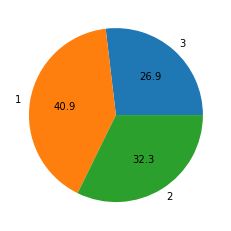

In [18]:
pt.pie(mean_age.values(),labels=mean_age.keys(),autopct='%.1f')
pt.show()

In [19]:
tita.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [20]:
tita.dropna(inplace=True)
# drops all the row that have NaN values

In [21]:
tita.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [22]:
tita.shape

(889, 7)

In [23]:
# convert text to numerical data
tita

Survived  Pclass     Sex  Age  SibSp  Parch Embarked
0           0       3    male   22      1      0        S
1           1       1  female   38      1      0        C
2           1       3  female   26      0      0        S
3           1       1  female   35      1      0        S
4           0       3    male   35      0      0        S
..        ...     ...     ...  ...    ...    ...      ...
886         0       2    male   27      0      0        S
887         1       1  female   19      0      0        S
888         0       3  female   25      1      2        S
889         1       1    male   26      0      0        C
890         0       3    male   32      0      0        Q

[889 rows x 7 columns]

In [24]:
tita['Sex'].replace(['male','female'],[1,0],inplace=True)
tita

Survived  Pclass  Sex  Age  SibSp  Parch Embarked
0           0       3    1   22      1      0        S
1           1       1    0   38      1      0        C
2           1       3    0   26      0      0        S
3           1       1    0   35      1      0        S
4           0       3    1   35      0      0        S
..        ...     ...  ...  ...    ...    ...      ...
886         0       2    1   27      0      0        S
887         1       1    0   19      0      0        S
888         0       3    0   25      1      2        S
889         1       1    1   26      0      0        C
890         0       3    1   32      0      0        Q

[889 rows x 7 columns]

In [25]:
un_emb=tita['Embarked'].unique()
un_emb

array(['S', 'C', 'Q'], dtype=object)

In [26]:
tita['Embarked'].replace(un_emb,[i for i in range(1,len(un_emb)+1)],inplace=True)
tita

Survived  Pclass  Sex  Age  SibSp  Parch  Embarked
0           0       3    1   22      1      0         1
1           1       1    0   38      1      0         2
2           1       3    0   26      0      0         1
3           1       1    0   35      1      0         1
4           0       3    1   35      0      0         1
..        ...     ...  ...  ...    ...    ...       ...
886         0       2    1   27      0      0         1
887         1       1    0   19      0      0         1
888         0       3    0   25      1      2         1
889         1       1    1   26      0      0         2
890         0       3    1   32      0      0         3

[889 rows x 7 columns]

In [27]:
X = tita.loc[:,'Pclass':'Embarked']
y = tita['Survived']
X

Pclass  Sex  Age  SibSp  Parch  Embarked
0         3    1   22      1      0         1
1         1    0   38      1      0         2
2         3    0   26      0      0         1
3         1    0   35      1      0         1
4         3    1   35      0      0         1
..      ...  ...  ...    ...    ...       ...
886       2    1   27      0      0         1
887       1    0   19      0      0         1
888       3    0   25      1      2         1
889       1    1   26      0      0         2
890       3    1   32      0      0         3

[889 rows x 6 columns]

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.4,random_state=25)

In [39]:
#Using Decision Tree 
from sklearn.tree import DecisionTreeClassifier 
model4 = DecisionTreeClassifier (criterion='entropy', random_state=7) 
model4.fit(X_train,Y_train) 
y_pred4 = model4.predict(X_test)


from sklearn.metrics import accuracy_score 
dtac=accuracy_score(Y_test,y_pred4)
dtac

0.7387640449438202

In [30]:
y_pred4

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [31]:
y_pred4 = model4.predict(X_test)

In [32]:
model4.predict([[3,0,25,0,0,3]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [33]:
model4.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [34]:
f1_score(Y_test,y_pred4)

0.6642599277978338

In [35]:
classification_report(Y_test,y_pred4)


'              precision    recall  f1-score   support\n\n           0       0.77      0.81      0.79       212\n           1       0.69      0.64      0.66       144\n\n    accuracy                           0.74       356\n   macro avg       0.73      0.72      0.73       356\nweighted avg       0.74      0.74      0.74       356\n'

In [36]:
con_mat=confusion_matrix(Y_test,y_pred4)
con_mat

array([[171,  41],
       [ 52,  92]], dtype=int64)

In [37]:
#survival chances
con_mat.trace()/con_mat.sum()

0.7387640449438202

In [38]:
(con_mat[0][1]+con_mat[1][0])/con_mat.sum()
# death chances

0.2612359550561798